In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Introduction
# This notebook explores and cleans a wine dataset containing over 12,700 samples and multiple chemical attributes. We will perform Exploratory Data Analysis (EDA)
# to identify data integrity issues and clean and evaluate the data
# the results post-cleaning to ensure suitability for machine learning.



# Set display and visualization options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

filename = "https://raw.githubusercontent.com/JustJahed/CSCI-381-DataAnalytics/refs/heads/main/Quiz3_Data.csv"
df = pd.read_csv(filename)
df.head()

#set up a clean copy as a safety for later
df_copy = df

df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000



Missing Values:
 INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


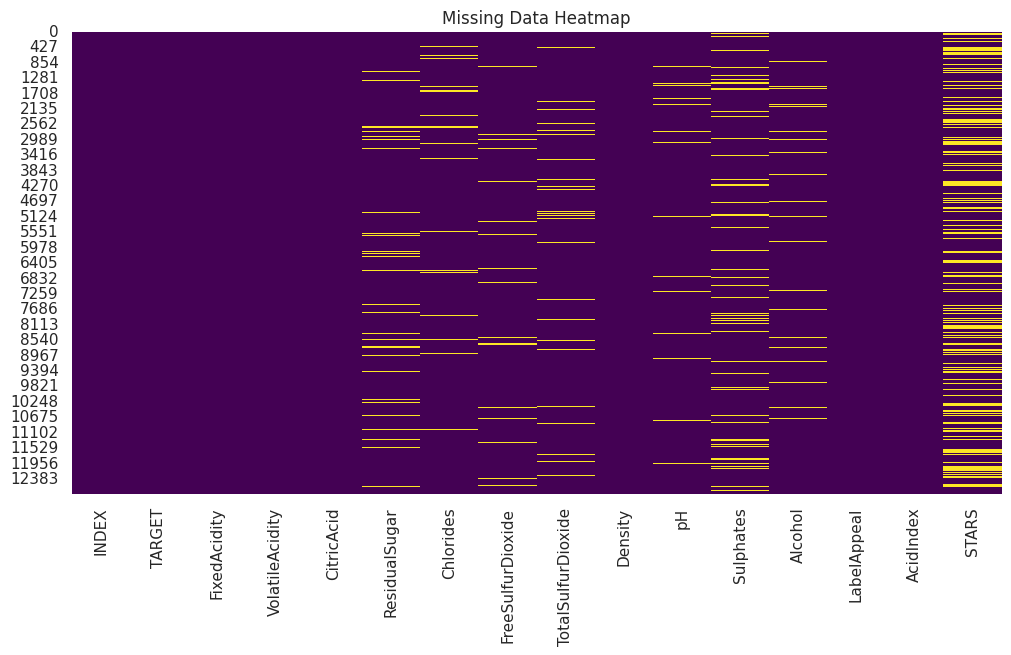

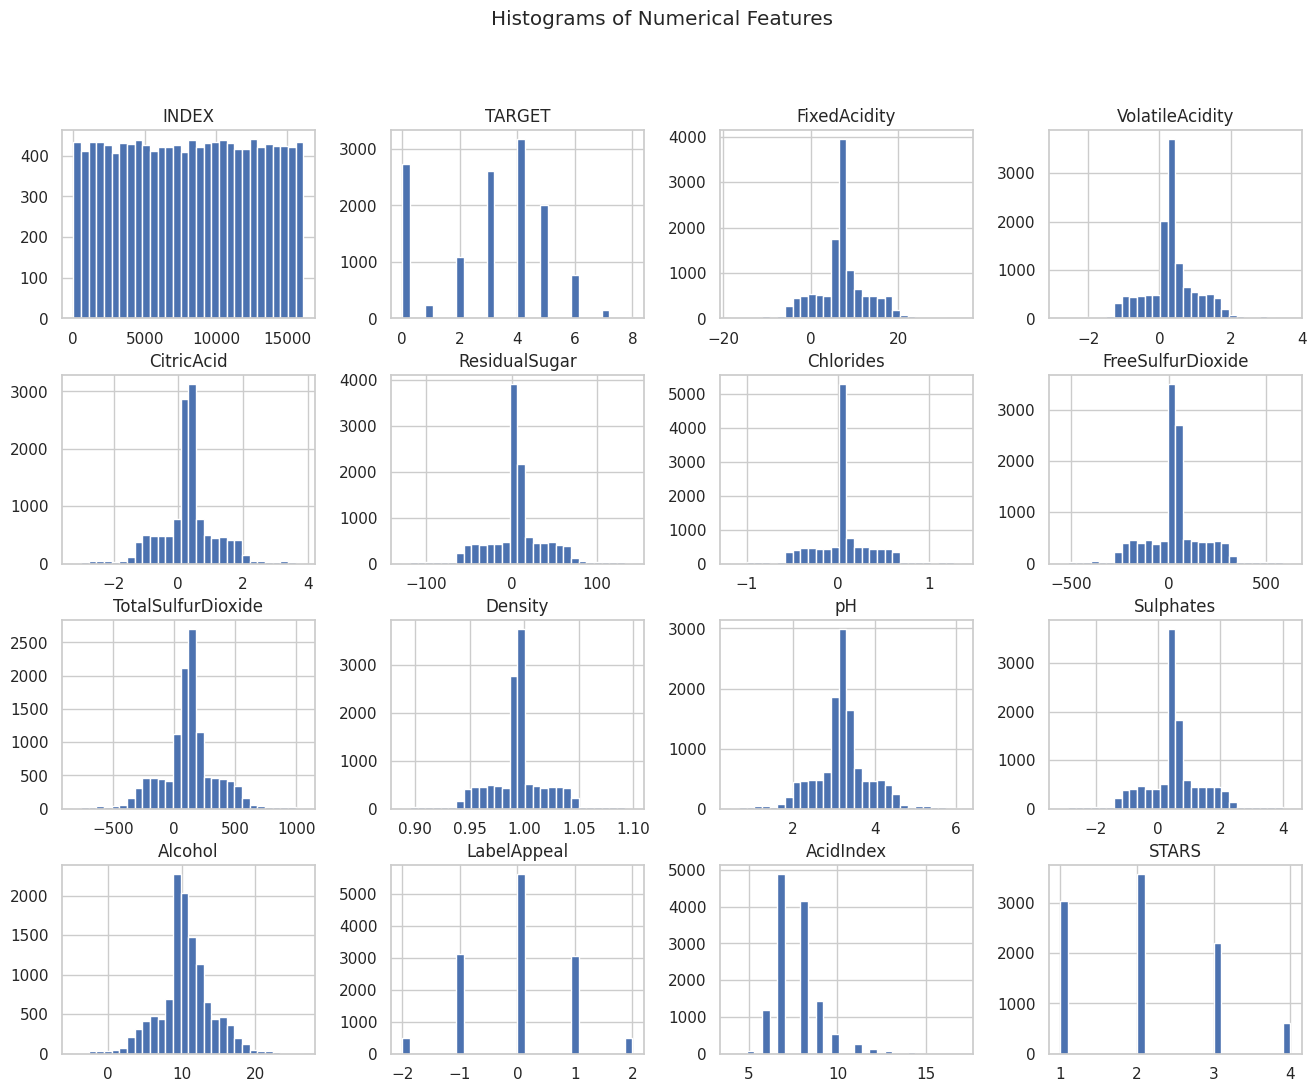

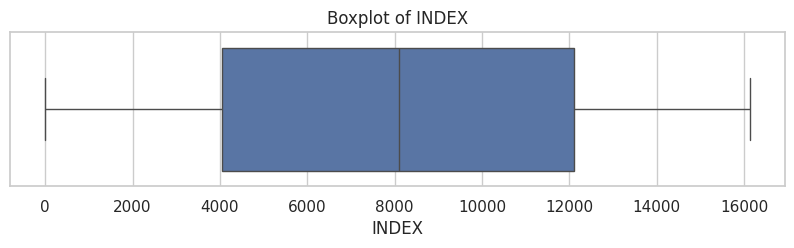

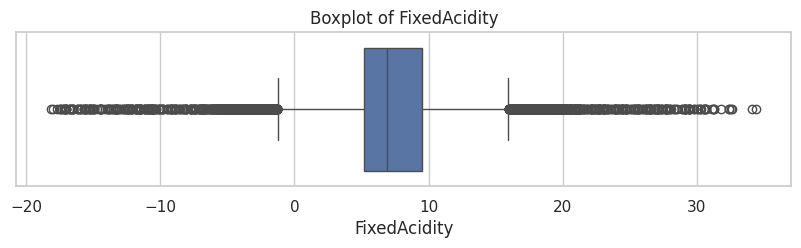

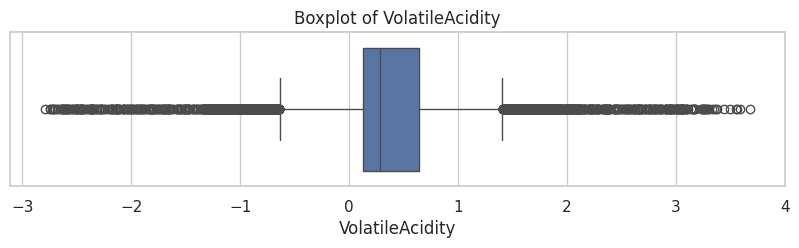

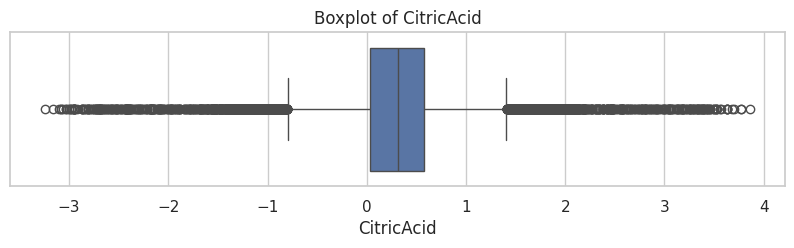

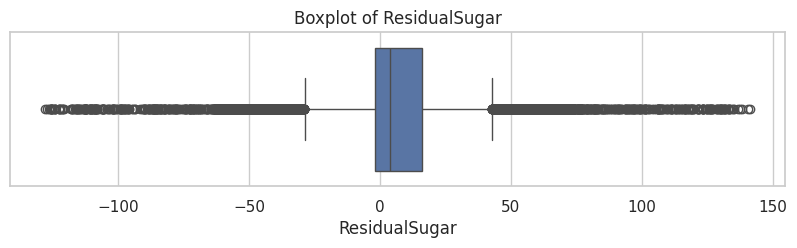

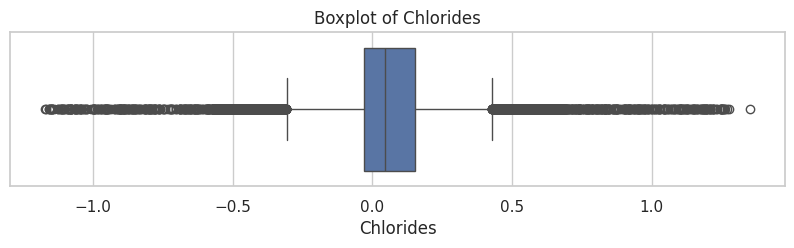

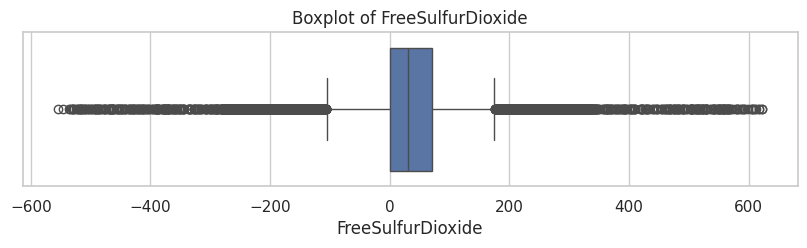

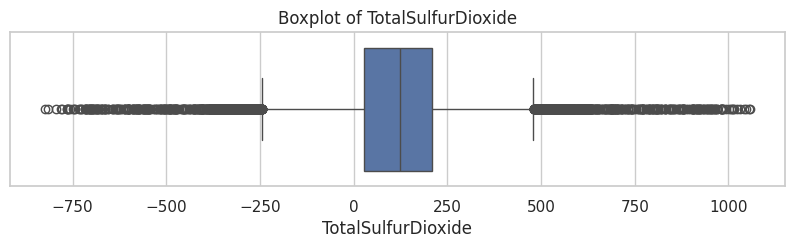

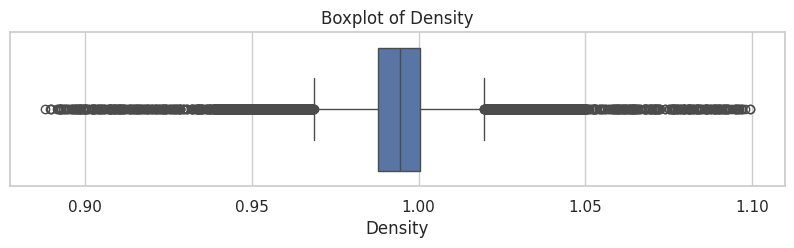

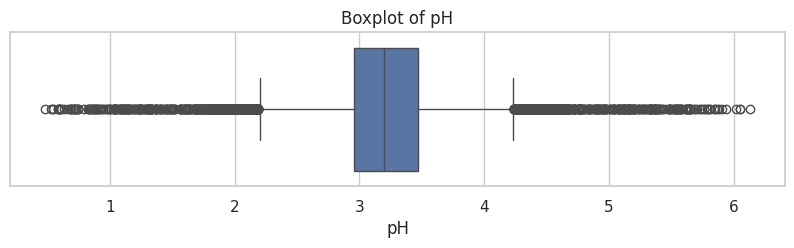

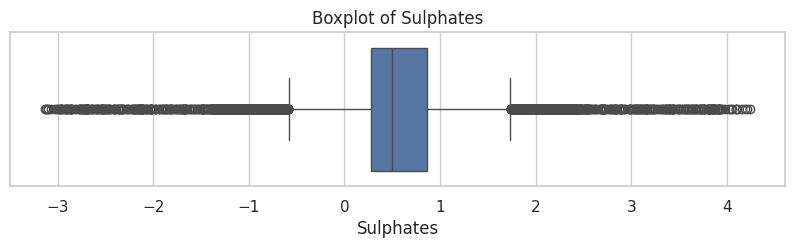

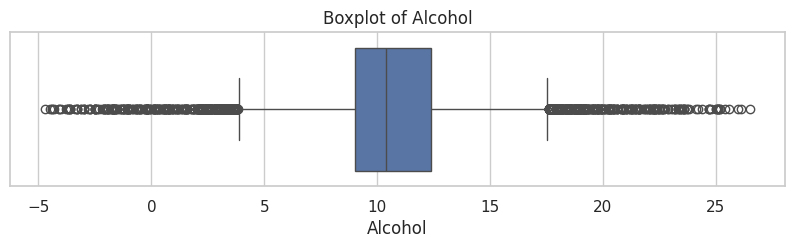

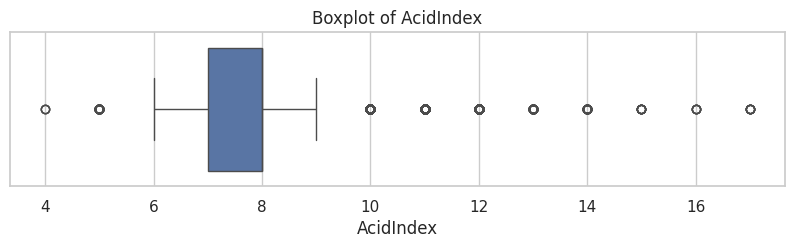

In [14]:
# 2. Exploratory Data Analysis
# info and stats
print(df.info())
display(df.describe())

# Count missing values
missing_counts = df.isnull().sum()
print("\nMissing Values:\n", missing_counts)

# Visualize missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# Histograms for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols].hist(bins=30, figsize=(16,12))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots to detect outliers
for col in numeric_cols:
    if df[col].nunique() > 10:
        plt.figure(figsize=(10, 2))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

In [15]:
# 3. Data Preparation
# Handling missing values and invalid data
# Replace invalid negatives with NaN for relevant columns
cols_with_invalids = ['CitricAcid', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide']
for col in cols_with_invalids:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

# Impute missing values w/ the median
for col in df.columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Optional: Log transform skewed features
skewed_cols = ['ResidualSugar', 'TotalSulfurDioxide']
for col in skewed_cols:
    df[f'{col}_log'] = np.log1p(df[col])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# 4. Prepped Data Review
# Re-run summary statistics and histograms for transformed columns
print(df.describe())

# Histograms after transformation
for col in skewed_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(df[f'{col}_log'], kde=True)
    plt.title(f"Histogram of Log-Transformed {col}")
    plt.show()


              INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8069.980305      3.029074      7.075717         0.324104   
std     4656.905107      1.926368      6.317643         0.784014   
min        1.000000      0.000000    -18.100000        -2.790000   
25%     4037.500000      2.000000      5.200000         0.130000   
50%     8110.000000      3.000000      6.900000         0.280000   
75%    12106.500000      4.000000      9.500000         0.640000   
max    16129.000000      8.000000     34.400000         3.680000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12795.000000  12795.000000       12795.000000   
mean       0.587769       5.345615      0.150658          77.662642   
std        0.542685      32.928486      0.199170          91.508875   
min        0.000000    -127.800000      0.000000           0.000000   
25%        0.300000       0.9000

In [ ]:
# 5. Conclusions
# The dataset cleaned and examined by identifying and correcting negative/invalid values
# Imputing missing data using medians
# Applying log transformations to reduce skewness
# In doing so, making the data more compatible for machine learning modeling.